<a href="https://colab.research.google.com/github/data-sci-capstone/copilot/blob/alfonso/dialogSum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean, median
from google.colab import drive
from collections import defaultdict
import math
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/imdb/dialogSum_train.csv")
train_df.head()

,id,dialogue,summary,topic
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance


In [3]:
# total rows and columns
print(f"Total rows: {len(train_df)}\tTotal Columns: {len(train_df.columns)}")

Total rows: 12460	Total Columns: 4


In [4]:
range_of_topics = set(train_df["topic"])
print(f"Range of topics in dialogSum: {len(range_of_topics)}")

Range of topics in dialogSum: 7434


In [5]:
#checking for dup id's
print(f"There are a total of {len(set(train_df['id']))} unique rows.")

There are a total of 12460 unique rows.


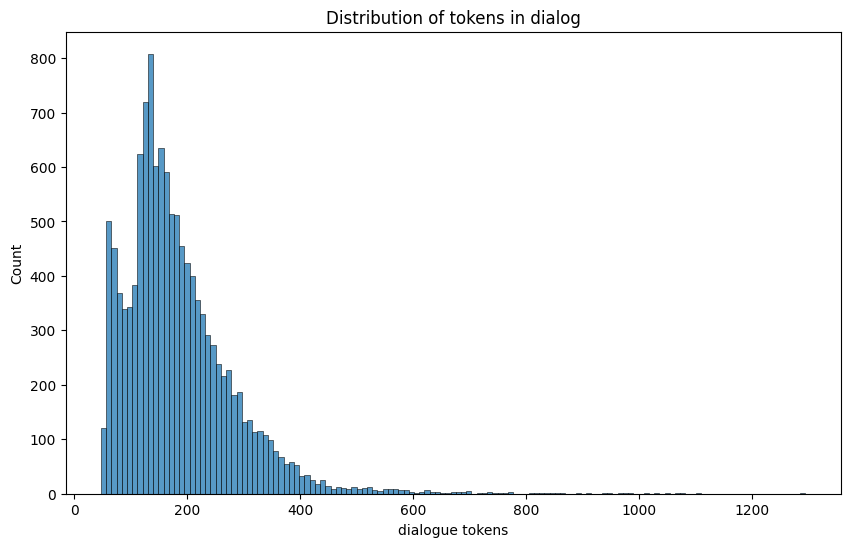

In [6]:
plt.figure(figsize = (10, 6))
sns.histplot(data=train_df["dialogue"].str.len() / 4)
plt.title("Distribution of tokens in dialogue")
plt.xlabel("dialogue tokens")
plt.show()

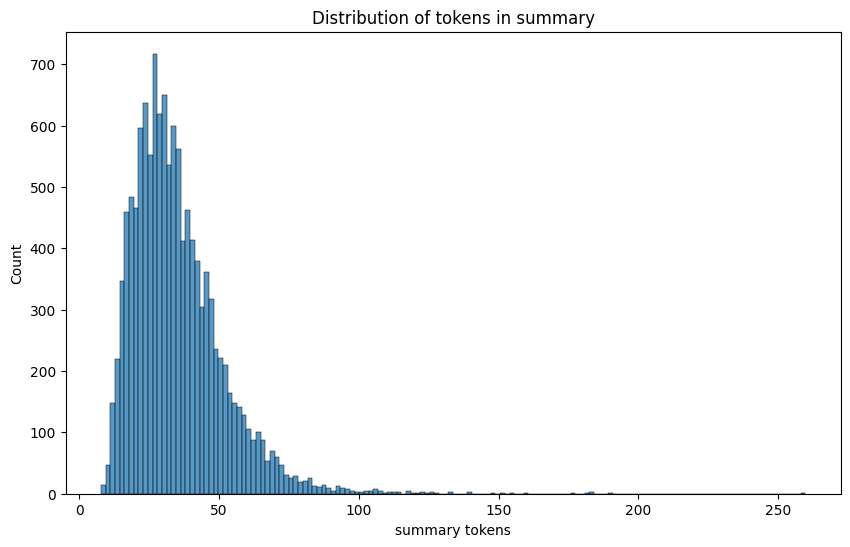

In [7]:
plt.figure(figsize = (10, 6))
sns.histplot(data=train_df["summary"].str.len() / 4)
plt.title("Distribution of tokens in summary")
plt.xlabel("summary tokens")
plt.show()

In [8]:
topics = defaultdict(int)
for topic in train_df["topic"]:
  topics[topic] += 1

topics = sorted(topics.items(), key= lambda x: x[1], reverse = True)
topics[:10]

[('shopping', 174),
 ('job interview', 161),
 ('daily casual talk', 125),
 ('phone call', 89),
 ('order food', 79),
 ('interview', 77),
 ('social meeting', 56),
 ('business talk', 48),
 ('see a doctor', 46),
 ('weather', 42)]

In [9]:
train_df["dialogue_tokens"] = train_df["dialogue"].apply(lambda x: len(x) / 4)
train_df.head()

,id,dialogue,summary,topic,dialogue_tokens
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up,232.75
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines,194.00
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys,125.00
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend,131.50
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance,120.00


In [10]:
train_df["summary_tokens"] = train_df["summary"].apply(lambda x: len(x) / 4)
train_df.head()

,id,dialogue,summary,topic,dialogue_tokens,summary_tokens
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up,232.75,46.75
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines,194.00,25.25
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys,125.00,20.25
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend,131.50,27.50
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance,120.00,23.25


In [12]:
train_df["sentiment"] = np.random.randint(0, 3, size = 12460)
train_df.head()

,id,dialogue,summary,topic,dialogue_tokens,summary_tokens,sentiment
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up,232.75,46.75,0
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines,194.00,25.25,2
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys,125.00,20.25,2
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend,131.50,27.50,0
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance,120.00,23.25,2


# Check for duplicate values: Dialogue

In [58]:
len(set(train_df["dialogue"]))

12458

In [59]:
# Find duplicate dialogues and check for whether the row is the same as a whole.

dialogues = defaultdict(int)
for dialogue in train_df["dialogue"]:
  dialogues[dialogue] += 1

dialogues = sorted(dialogues.items(), key=lambda x: x[1], reverse= True)

duplicate_dialogue = []
for dialogue, count in dialogues:
  if count > 1:
    duplicate_dialogue.append(dialogue)

print(f"Number of duplicate dialogues: {int(len(duplicate_dialogue))}")

Number of duplicate dialogues: 2


In [ ]:
for dup in duplicate_dialogue:

  print(train_df[train_df["dialogue"] == dup].to_string(index=False))

In [40]:
train_df[train_df["id"] == "train_1626"]

,id,dialogue,summary,topic,dialogue_tokens,summary_tokens,sentiment
1626,train_1626,#Person1#: Any plans tonight? \n#Person2#: Not...,#Person1# invites #Person2# to have a drink be...,social communication,215.0,45.0,2


In [41]:
train_df[train_df["id"] == "train_9118"]

,id,dialogue,summary,topic,dialogue_tokens,summary_tokens,sentiment
9118,train_9118,#Person1#: Any plans tonight? \n#Person2#: Not...,#Person1# invites #Person2# to take a hang-out...,after inteview,215.0,49.75,0


# Check for duplicates: Summaries

In [61]:
len(set(train_df["summary"]))

12436

In [60]:
# Find duplicate dialogues and check for whether the row is the same as a whole.

summaries = defaultdict(int)
for summary in train_df["summary"]:
  summaries[summary] += 1

summaries = sorted(summaries.items(), key=lambda x: x[1], reverse= True)

duplicate_summary = []
for summary, count in summaries:
  if count > 1:
    duplicate_summary.append(summary)

print(f"Number of duplicate summaries: {int(len(duplicate_summary))}")

Number of duplicate summaries: 24


In [62]:
for dup in duplicate_summary:

  print(train_df[train_df["summary"] == dup].to_string(index=False))

        id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [67]:
train_df[train_df["id"] == "train_254"]

,id,dialogue,summary,topic,dialogue_tokens,summary_tokens,sentiment
254,train_254,"#Person1#: Tom, aren't you a little too old to...",#Person1# thinks Tom is too old to be trick-or...,trick-or-treating,132.25,21.0,0


In [73]:
train_df[train_df["id"] == "train_5762"]

,id,dialogue,summary,topic,dialogue_tokens,summary_tokens,sentiment
5762,train_5762,"#Person1#: Tom, aren't you a little too old to...",#Person1# thinks Tom is too old to be trick-or...,trick-or-treat,132.75,21.0,1


In [76]:
train_df.iloc[254, 2]

'#Person1# thinks Tom is too old to be trick-or-treating but Tom insists on doing it.'

In [77]:
train_df.iloc[5762, 2]

'#Person1# thinks Tom is too old to be trick-or-treating but Tom insists on doing it.'

In [53]:
data = []
train_df["dialogue"].apply(lambda x: data.append(len(x.split(" "))))
average_text_len = mean(data)
median_text_len = median(data)
total_words = sum(data)
average_adult_wpm = 236 # https://wordsrated.com/reading-speed-statistics/
text_in_hours = math.ceil(((total_words / average_adult_wpm) / 60))
group_size = 4

print(f"Average text length by words: {math.ceil(average_text_len)}.\nMedian Text length by words: {math.ceil(median_text_len)}.\nTotal amount of text by words: {math.ceil(total_words)}\n\
Estimated time to read all text in hours: {text_in_hours}\nEstimated time per person in a group of 4: {math.ceil(text_in_hours / group_size)}")

Average text length by words: 124.
Median Text length by words: 109.
Total amount of text by words: 1541488
Estimated time to read all text in hours: 109
Estimated time per person in a group of 4: 28
